In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [ ]:

# Transaction Amount: This feature reflects the value of the transaction. Unusually high amounts may be an indicator of fraud.
# Transaction Date and Time: Helps to identify abnormal spending times, like transactions happening at odd hours or on holidays.
# Merchant Details: Information about where the transaction took place. Some merchants may have a higher likelihood of being associated with fraud.
# User Information: Data such as the customer’s location, spending behavior, or profile could help identify patterns typical of fraud.
# Transaction Type (e.g., purchase, refund): Knowing the type of transaction can help identify suspicious behavior like an unusually large refund or an expensive purchase.
# Fraud Label (Target variable): This is the binary label (fraud or not fraud) that indicates whether the transaction is fraudulent, used for training and evaluating models.

# Web Scraping
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Load the HTML page
url = "https://peppy-bublanina-0743c8.netlify.app/"
response = requests.get(url)

# Step 2: Parse HTML
soup = BeautifulSoup(response.text, 'html.parser')

# Step 3: Find the CSV download link safely
link_tag = soup.find('a', href=True, string=lambda t: t and 'csv' in t.lower())

if link_tag:
    # Build full CSV URL
    csv_href = link_tag['href']
    csv_url = csv_href if csv_href.startswith('http') else f"{url}{csv_href.lstrip('/')}"

    print("CSV Link Found:", csv_url)

    try:
        # Step 4: Load CSV
        df = pd.read_csv(csv_url)
        print("CSV loaded successfully:")
        display(df.head(10))
        display(df.info())
    except Exception as e:
        print("Failed to load CSV:", e)

else:
    print("No CSV link found on the page.")


CSV Link Found: https://peppy-bublanina-0743c8.netlify.app/fraudTest.csv
CSV loaded successfully:


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
5,5,2020-06-21 12:15:37,30407675418785,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,...,42.1939,-76.7361,520,Psychotherapist,1991-10-13,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,0
6,6,2020-06-21 12:15:44,213180742685905,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,...,40.5070,-123.9743,1139,"Therapist, occupational",1951-01-15,17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,0
7,7,2020-06-21 12:15:50,3589289942931264,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,...,43.7557,-97.5936,343,"Development worker, international aid",1972-03-05,8be473af4f05fc6146ea55ace73e7ca2,1371816950,44.495498,-97.728453,0
8,8,2020-06-21 12:16:10,3596357274378601,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,...,41.0001,-78.2357,3688,Advice worker,1973-05-27,71a1da150d1ce510193d7622e08e784e,1371816970,41.546067,-78.120238,0
9,9,2020-06-21 12:16:11,3546897637165774,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,...,31.6591,-96.8094,263,Barrister,1956-05-30,a7915132c7c4240996ba03a47f81e3bd,1371816971,31.782919,-96.366185,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

None

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
# (1) Data preprocessing

# 1. Check for missing values and data types
missing_values = df.isnull().sum().sum()
display(missing_values)

# Impute missing numerical values with the median
# numerical_cols = df.select_dtypes(include=[np.number]).columns
# imputer = SimpleImputer(strategy='median')
# df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Impute missing categorical values with the mode
# categorical_cols = df.select_dtypes(exclude=[np.number]).columns
# imputer = SimpleImputer(strategy='most_frequent')
# df[categorical_cols] = imputer.fit_transform(df[categorical_cols])

np.int64(0)

In [ ]:
# 2. Check for duplicate records
duplicate_count = df.duplicated()
display(duplicate_count)
print("Total Duplicate Records Found in dataset:", duplicate_count.sum())

# df = df.drop_duplicates()

,0
0,False
1,False
2,False
3,False
4,False
...,...
555714,False
555715,False
555716,False
555717,False


Total Duplicate Records Found in dataset: 0


In [ ]:
# 3. Drop unnecessary columns
if df.columns.str.contains("Unnamed: 0").any():
  df.drop(columns=["Unnamed: 0"], inplace=True)

# 4. Label encoding for binary columns
categorical_columns = ["merchant", "category", "gender", "job", "state", "city", "street"]
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for reference

# Get the LabelEncoder used for 'category'
category_le = label_encoders['category']

# Create a mapping from encoded values to original labels
category_mapping = dict(zip(range(len(category_le.classes_)), category_le.classes_))

# Map the encoded category column in df_balanced
df['category_label'] = df['category'].map(category_mapping)

print("Dataset after Encoding the categorical column: ")
display(df.head())

Dataset after Encoding the categorical column: 


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,category_label
0,2020-06-21 12:14:25,2291163933867244,319,10,2.86,Jeff,Elliott,1,341,157,...,-80.9355,333497,275,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,personal_care
1,2020-06-21 12:14:33,3573030041201292,591,10,29.84,Joanne,Williams,0,354,16,...,-110.4360,302,392,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,personal_care
2,2020-06-21 12:14:53,3598215285024754,611,5,41.28,Ashley,Lopez,0,865,61,...,-73.5365,34496,259,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,health_fitness
3,2020-06-21 12:15:15,3591919803438423,222,9,60.05,Brian,Williams,1,320,764,...,-80.8191,54767,407,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,misc_pos
4,2020-06-21 12:15:17,3526826139003047,292,13,3.19,Nathan,Massey,1,548,247,...,-85.0170,1126,196,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,travel


In [ ]:
# 5. Use StandardScaler instead of MinMaxScaler
numerical_cols = ['lat','long','city_pop','merch_lat','merch_long']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display processed data
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,category_label
0,2020-06-21 12:14:25,2291163933867244,319,10,2.86,Jeff,Elliott,1,341,157,...,0.677451,0.816521,275,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,-0.894145,0.657586,0,personal_care
1,2020-06-21 12:14:33,3573030041201292,591,10,29.84,Joanne,Williams,0,354,16,...,-1.472454,-0.292685,392,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,0.178126,-1.436610,0,personal_care
2,2020-06-21 12:14:53,3598215285024754,611,5,41.28,Ashley,Lopez,0,865,61,...,1.216667,-0.178853,259,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,0.383257,1.167640,0,health_fitness
3,2020-06-21 12:15:15,3591919803438423,222,9,60.05,Brian,Williams,1,320,764,...,0.685934,-0.111371,407,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,-1.909485,0.680717,0,misc_pos
4,2020-06-21 12:15:17,3526826139003047,292,13,3.19,Nathan,Massey,1,548,247,...,0.380004,-0.289942,196,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,1.259139,0.316510,0,travel


In [ ]:
# 6. Extract age from dob
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])
df["age"] = (df["trans_date_trans_time"].dt.year - df["dob"].dt.year)
df.drop(columns=["dob"], inplace=True)

# 7. Extract transaction time details
df["trans_hour"] = df["trans_date_trans_time"].dt.hour
df["trans_day"] = df["trans_date_trans_time"].dt.day
df["trans_month"] = df["trans_date_trans_time"].dt.month

df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,category_label,age,trans_hour,trans_day,trans_month
0,2020-06-21 12:14:25,2291163933867244,319,10,2.86,Jeff,Elliott,1,341,157,...,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,-0.894145,0.657586,0,personal_care,52,12,21,6
1,2020-06-21 12:14:33,3573030041201292,591,10,29.84,Joanne,Williams,0,354,16,...,324cc204407e99f51b0d6ca0055005e7,1371816873,0.178126,-1.436610,0,personal_care,30,12,21,6
2,2020-06-21 12:14:53,3598215285024754,611,5,41.28,Ashley,Lopez,0,865,61,...,c81755dbbbea9d5c77f094348a7579be,1371816893,0.383257,1.167640,0,health_fitness,50,12,21,6
3,2020-06-21 12:15:15,3591919803438423,222,9,60.05,Brian,Williams,1,320,764,...,2159175b9efe66dc301f149d3d5abf8c,1371816915,-1.909485,0.680717,0,misc_pos,33,12,21,6
4,2020-06-21 12:15:17,3526826139003047,292,13,3.19,Nathan,Massey,1,548,247,...,57ff021bd3f328f8738bb535c302a31b,1371816917,1.259139,0.316510,0,travel,65,12,21,6


In [ ]:
# 8. Dealing with outliers
df['amt_zscore'] = zscore(df['amt'])
rows_to_drop = df[abs(df['amt_zscore'])>3]
df.drop(rows_to_drop.index, inplace=True)
df.drop(columns=['amt_zscore'], inplace=True)
df.reset_index(drop=True, inplace=True)

df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,category_label,age,trans_hour,trans_day,trans_month
0,2020-06-21 12:14:25,2291163933867244,319,10,2.86,Jeff,Elliott,1,341,157,...,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,-0.894145,0.657586,0,personal_care,52,12,21,6
1,2020-06-21 12:14:33,3573030041201292,591,10,29.84,Joanne,Williams,0,354,16,...,324cc204407e99f51b0d6ca0055005e7,1371816873,0.178126,-1.436610,0,personal_care,30,12,21,6
2,2020-06-21 12:14:53,3598215285024754,611,5,41.28,Ashley,Lopez,0,865,61,...,c81755dbbbea9d5c77f094348a7579be,1371816893,0.383257,1.167640,0,health_fitness,50,12,21,6
3,2020-06-21 12:15:15,3591919803438423,222,9,60.05,Brian,Williams,1,320,764,...,2159175b9efe66dc301f149d3d5abf8c,1371816915,-1.909485,0.680717,0,misc_pos,33,12,21,6
4,2020-06-21 12:15:17,3526826139003047,292,13,3.19,Nathan,Massey,1,548,247,...,57ff021bd3f328f8738bb535c302a31b,1371816917,1.259139,0.316510,0,travel,65,12,21,6


In [ ]:
# Step 9: Feature Engineering
df['transaction_count'] = df.groupby('cc_num')['trans_num'].transform('count')
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,unix_time,merch_lat,merch_long,is_fraud,category_label,age,trans_hour,trans_day,trans_month,transaction_count
0,2020-06-21 12:14:25,2291163933867244,319,10,2.86,Jeff,Elliott,1,341,157,...,1371816865,-0.894145,0.657586,0,personal_care,52,12,21,6,638
1,2020-06-21 12:14:33,3573030041201292,591,10,29.84,Joanne,Williams,0,354,16,...,1371816873,0.178126,-1.436610,0,personal_care,30,12,21,6,831
2,2020-06-21 12:14:53,3598215285024754,611,5,41.28,Ashley,Lopez,0,865,61,...,1371816893,0.383257,1.167640,0,health_fitness,50,12,21,6,1064
3,2020-06-21 12:15:15,3591919803438423,222,9,60.05,Brian,Williams,1,320,764,...,1371816915,-1.909485,0.680717,0,misc_pos,33,12,21,6,656
4,2020-06-21 12:15:17,3526826139003047,292,13,3.19,Nathan,Massey,1,548,247,...,1371816917,1.259139,0.316510,0,travel,65,12,21,6,889


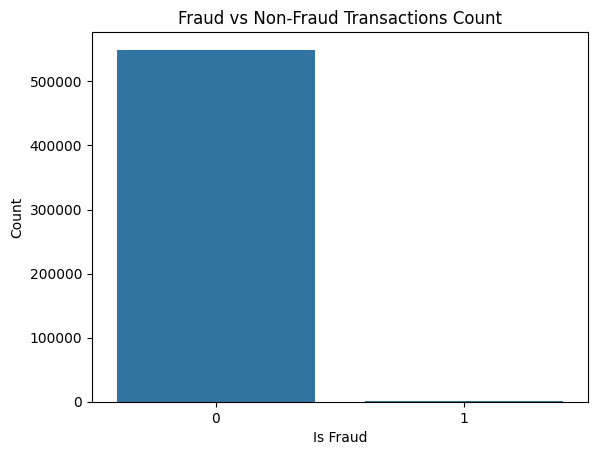

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='is_fraud', data=df)
plt.title('Fraud vs Non-Fraud Transactions Count')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()


In [ ]:
# 10. Handling Imbalanced Classes (Oversampling Minority Class)
# Check the class distribution
print(df['is_fraud'].value_counts())

# Separate the majority and minority classes
df_majority = df[df['is_fraud'] == 0]
df_minority = df[df['is_fraud'] == 1]

# Oversample the minority class using the 'resample' method
df_minority_oversampled = resample(df_minority,
                                   replace=True,     # Sample with replacement
                                   n_samples=len(df_majority),  # Match majority class size
                                   random_state=42)

# Combine the oversampled minority class with the majority class
df_balanced = pd.concat([df_majority, df_minority_oversampled])

print("The dataset after being balanced: ")
display(df_balanced.head())

# Check the class distribution after oversampling
print(df_balanced['is_fraud'].value_counts())

is_fraud
0    549484
1      1120
Name: count, dtype: int64
The dataset after being balanced: 


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,unix_time,merch_lat,merch_long,is_fraud,category_label,age,trans_hour,trans_day,trans_month,transaction_count
0,2020-06-21 12:14:25,2291163933867244,319,10,2.86,Jeff,Elliott,1,341,157,...,1371816865,-0.894145,0.657586,0,personal_care,52,12,21,6,638
1,2020-06-21 12:14:33,3573030041201292,591,10,29.84,Joanne,Williams,0,354,16,...,1371816873,0.178126,-1.436610,0,personal_care,30,12,21,6,831
2,2020-06-21 12:14:53,3598215285024754,611,5,41.28,Ashley,Lopez,0,865,61,...,1371816893,0.383257,1.167640,0,health_fitness,50,12,21,6,1064
3,2020-06-21 12:15:15,3591919803438423,222,9,60.05,Brian,Williams,1,320,764,...,1371816915,-1.909485,0.680717,0,misc_pos,33,12,21,6,656
4,2020-06-21 12:15:17,3526826139003047,292,13,3.19,Nathan,Massey,1,548,247,...,1371816917,1.259139,0.316510,0,travel,65,12,21,6,889


is_fraud
0    549484
1    549484
Name: count, dtype: int64


In [ ]:
# (2) Descriptive Statistical Analysis for centrality, spread and normality
# Compute descriptive statistics
df_numeric = df.select_dtypes(include=[np.number])
descriptive_stats = df_numeric.describe().T

# Compute skewness and kurtosis for normality check
descriptive_stats["skewness"] = df_numeric.skew()
descriptive_stats["kurtosis"] = df_numeric.kurtosis()

# Display results
display(descriptive_stats)

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
cc_num,550604.0,4.181387e+17,1.310238e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18,2.847769,6.156544
merchant,550604.0,3.430454e+02,2.013577e+02,0.000000e+00,1.650000e+02,3.460000e+02,5.150000e+02,6.920000e+02,0.007818,-1.217046
category,550604.0,6.194672e+00,3.901820e+00,0.000000e+00,3.000000e+00,6.000000e+00,1.000000e+01,1.300000e+01,0.056661,-1.187895
amt,550604.0,6.004501e+01,6.593468e+01,1.000000e+00,9.540000e+00,4.667000e+01,8.168000e+01,5.395800e+02,2.668964,11.314738
gender,550604.0,4.514224e-01,4.976351e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.195234,-1.961891
street,550604.0,4.598394e+02,2.639702e+02,0.000000e+00,2.370000e+02,4.570000e+02,6.820000e+02,9.230000e+02,-0.000164,-1.171068
city,550604.0,4.222763e+02,2.448095e+02,0.000000e+00,2.120000e+02,4.200000e+02,6.370000e+02,8.480000e+02,0.012252,-1.205416
state,550604.0,2.577360e+01,1.411597e+01,0.000000e+00,1.400000e+01,2.600000e+01,3.700000e+01,4.900000e+01,-0.175736,-1.168908
zip,550604.0,4.884081e+04,2.685394e+04,1.257000e+03,2.629200e+04,4.817400e+04,7.201100e+04,9.992100e+04,0.077340,-1.095030
lat,550604.0,-1.509962e-04,9.999016e-01,-3.658356e+00,-7.654809e-01,1.636619e-01,6.621868e-01,5.363538e+00,-0.206778,0.738440


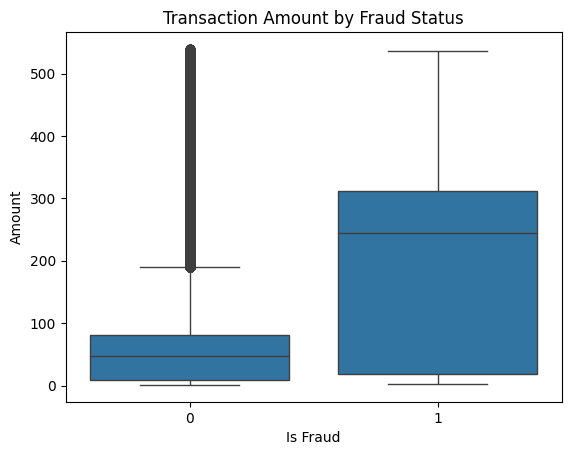

In [ ]:
# (3) Visual Analysis
# Transaction Amount by Fraud Status
sns.boxplot(x='is_fraud', y='amt', data=df_balanced)
plt.title('Transaction Amount by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')
plt.show()


In [ ]:
display(df_balanced[df_balanced['is_fraud'] == 0]['amt'].describe())
df_balanced[df_balanced['is_fraud'] == 1]['amt'].describe()

,amt
count,549484.000000
mean,59.801760
std,65.426719
min,1.000000
25%,9.530000
50%,46.650000
75%,81.560000
max,539.580000


,amt
count,549484.000000
mean,179.297418
std,151.047625
min,1.780000
25%,18.420000
50%,244.560000
75%,312.580000
max,536.630000


In [ ]:
# remove IQR-based outliers for a specific class
def remove_iqr_outliers(df, column, class_column, class_value):
    subset = df[df[class_column] == class_value]

    Q1 = subset[column].quantile(0.25)
    Q3 = subset[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only values within IQR bounds
    filtered_subset = subset[(subset[column] >= lower_bound) & (subset[column] <= upper_bound)]
    return filtered_subset

# Apply it to both classes
non_fraud_clean = remove_iqr_outliers(df_balanced, 'amt', 'is_fraud', 0)
fraud_clean = remove_iqr_outliers(df_balanced, 'amt', 'is_fraud', 1)

# Combine the cleaned subsets
df_balanced = pd.concat([non_fraud_clean, fraud_clean])

print(df_balanced['is_fraud'].value_counts())

is_fraud
1    549484
0    526149
Name: count, dtype: int64


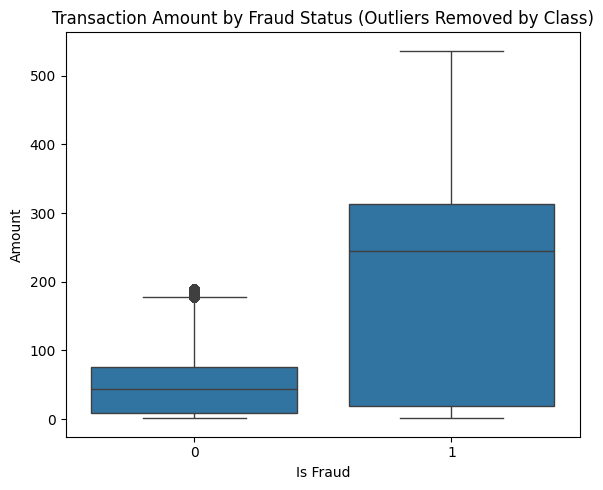

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.boxplot(data=df_balanced, x='is_fraud', y='amt')
plt.title('Transaction Amount by Fraud Status (Outliers Removed by Class)')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()


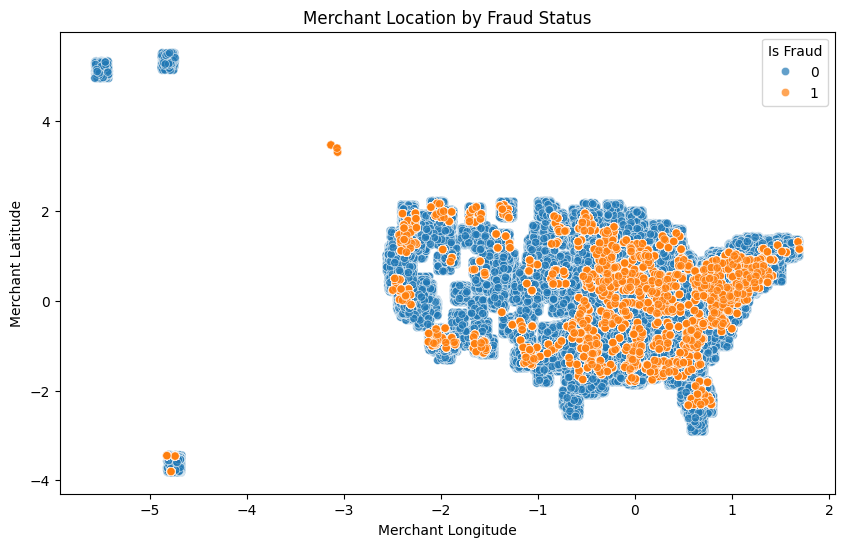

In [ ]:
# Merchant Latitude and Longitude (Location Spread)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='merch_long', y='merch_lat', hue='is_fraud', data=df_balanced, alpha=0.7)
plt.title('Merchant Location by Fraud Status')
plt.xlabel('Merchant Longitude')
plt.ylabel('Merchant Latitude')
plt.legend(title='Is Fraud')
plt.show()


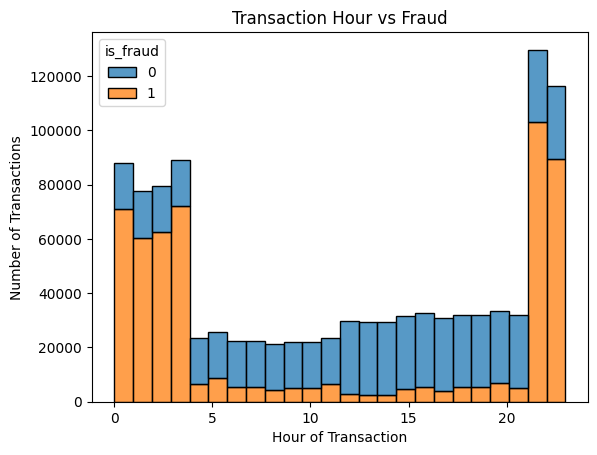

In [ ]:
# Hour of Transaction vs Fraud
sns.histplot(data=df_balanced, x='trans_hour', hue='is_fraud', multiple='stack', bins=24)
plt.title('Transaction Hour vs Fraud')
plt.xlabel('Hour of Transaction')
plt.ylabel('Number of Transactions')
plt.show()


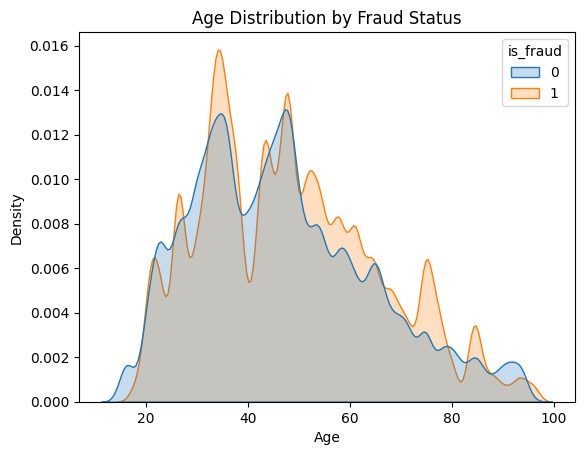

In [ ]:
# Age Distribution by Fraud
sns.kdeplot(data=df_balanced, x='age', hue='is_fraud', fill=True)
plt.title('Age Distribution by Fraud Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


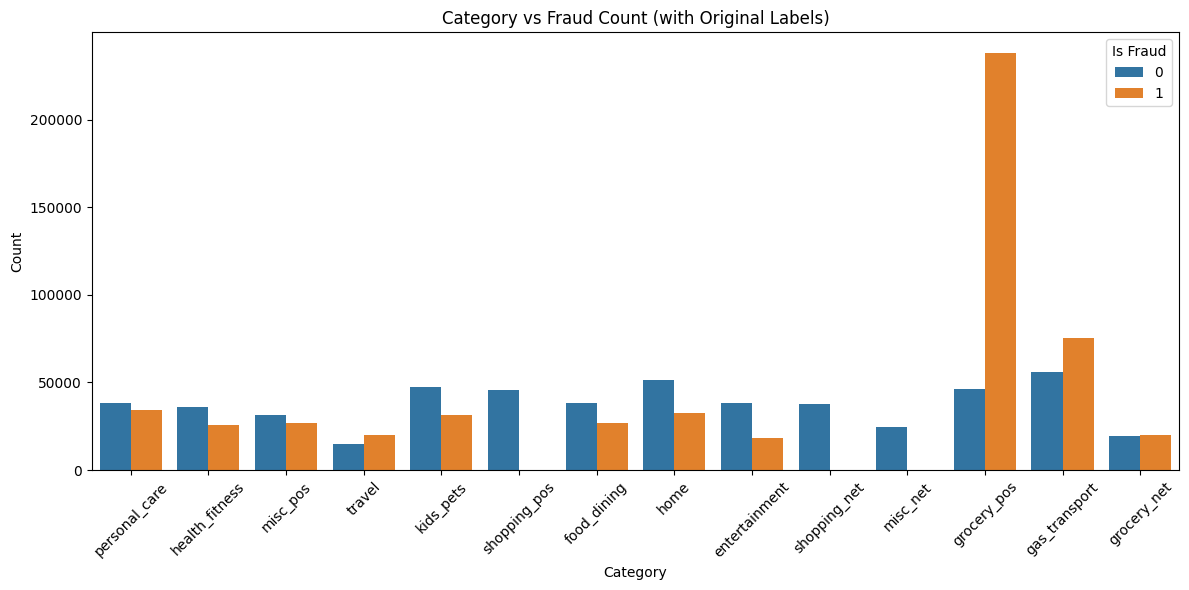

In [ ]:
#  Category vs Fraud
plt.figure(figsize=(12, 6))
sns.countplot(x='category_label', hue='is_fraud', data=df_balanced)
plt.title('Category vs Fraud Count (with Original Labels)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Is Fraud')
plt.tight_layout()
plt.show()



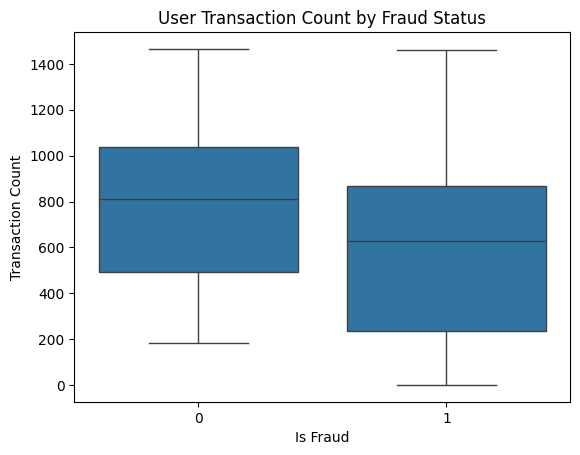

In [ ]:
# Transaction Count per User vs Fraud
sns.boxplot(x='is_fraud', y='transaction_count', data=df_balanced)
plt.title('User Transaction Count by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Count')
plt.show()


<Figure size 1000x1000 with 0 Axes>

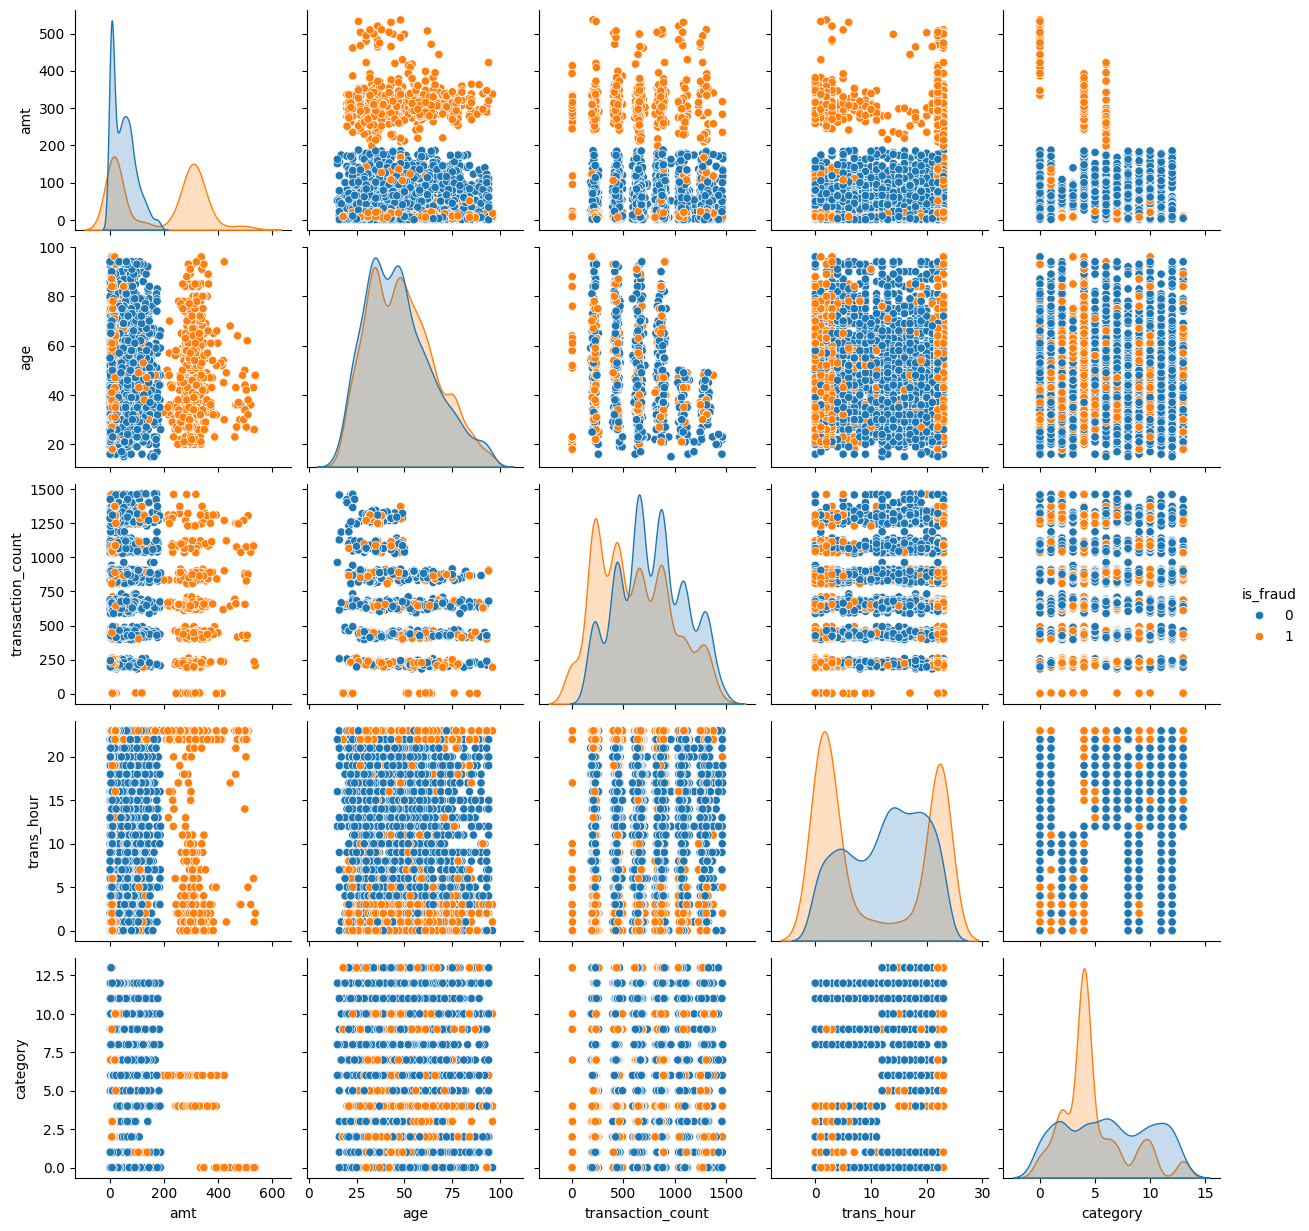

In [ ]:
# (4) Examine features’ distribution - using pairplot
plt.figure(figsize=(10, 10))
important_features = ['amt', 'age', 'transaction_count', 'trans_hour', 'category', 'is_fraud']
df_sampled = df_balanced.sample(n=5000, random_state=42)
sns.pairplot(df_sampled[important_features], hue='is_fraud')
plt.show()


In [ ]:
df_balanced.drop(columns=["first", "last", "trans_num", "category_label"], inplace=True, index=1)

<Axes: >

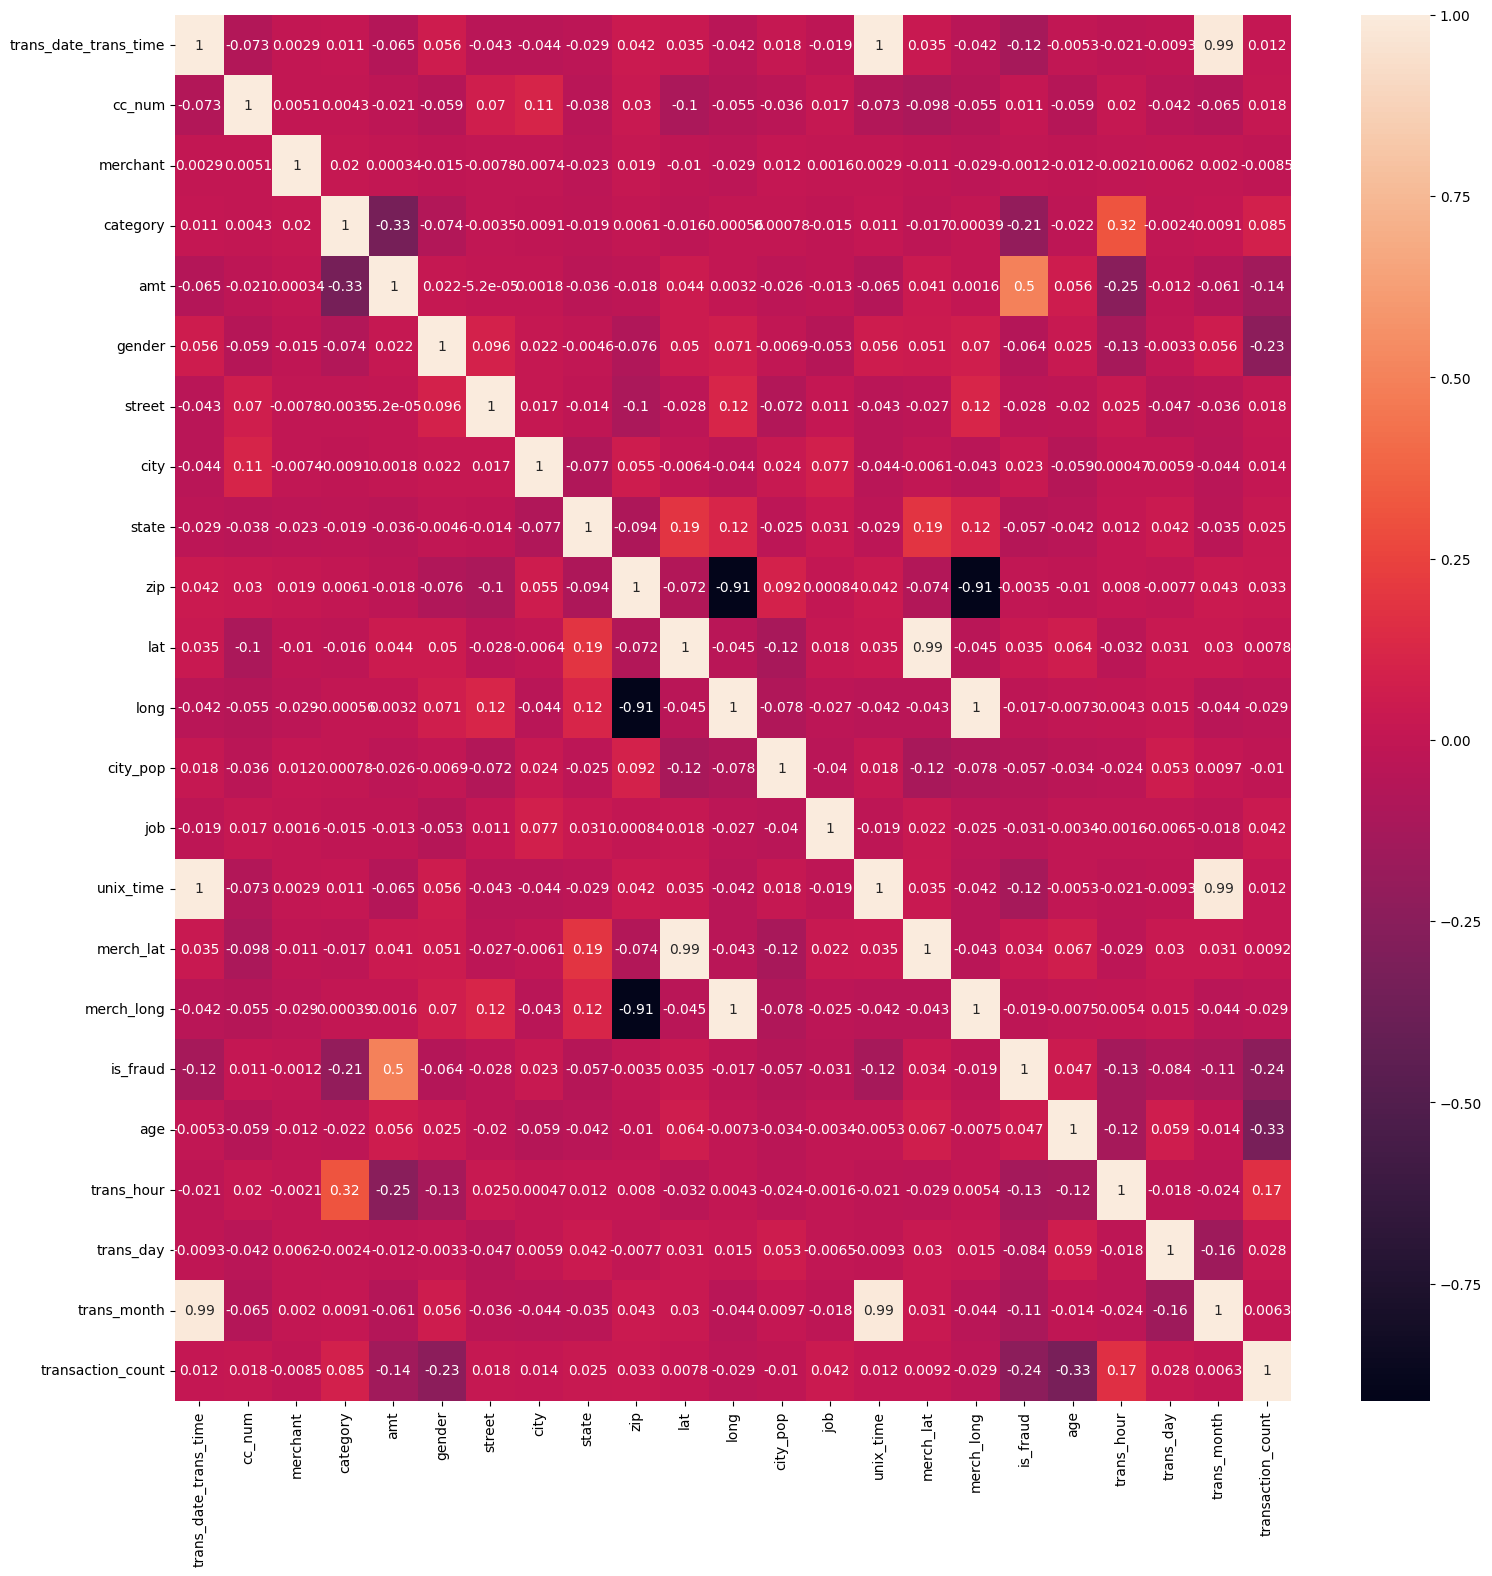

In [ ]:
# (5) Feature Selection based on correlation, covariance
plt.figure(figsize=(18, 18))
sns.heatmap(df_balanced.corr(), annot=True)

In [ ]:
# (6) Handling datetime
# 1. Convert datetime column to datetime object
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# 2. Extract useful datetime features
df['trans_date'] = df['trans_date_trans_time'].dt.date
df['trans_time'] = df['trans_date_trans_time'].dt.time
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_dayofweek'] = df['trans_date_trans_time'].dt.dayofweek  # Monday = 0, Sunday = 6
df['trans_dayname'] = df['trans_date_trans_time'].dt.day_name()
df['trans_month'] = df['trans_date_trans_time'].dt.month
df['trans_year'] = df['trans_date_trans_time'].dt.year

df.drop(columns=['trans_date_trans_time'], inplace=True)

# Preview the updated DataFrame
df.head()


,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,age,trans_hour,trans_day,trans_month,transaction_count,trans_date,trans_time,trans_dayofweek,trans_dayname,trans_year
0,2291163933867244,319,10,2.86,Jeff,Elliott,1,341,157,39,...,52,12,21,6,638,2020-06-21,12:14:25,6,Sunday,2020
1,3573030041201292,591,10,29.84,Joanne,Williams,0,354,16,43,...,30,12,21,6,831,2020-06-21,12:14:33,6,Sunday,2020
2,3598215285024754,611,5,41.28,Ashley,Lopez,0,865,61,33,...,50,12,21,6,1064,2020-06-21,12:14:53,6,Sunday,2020
3,3591919803438423,222,9,60.05,Brian,Williams,1,320,764,8,...,33,12,21,6,656,2020-06-21,12:15:15,6,Sunday,2020
4,3526826139003047,292,13,3.19,Nathan,Massey,1,548,247,21,...,65,12,21,6,889,2020-06-21,12:15:17,6,Sunday,2020


In [ ]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1075632 entries, 0 to 255364
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1075632 non-null  datetime64[ns]
 1   cc_num                 1075632 non-null  int64         
 2   merchant               1075632 non-null  int64         
 3   category               1075632 non-null  int64         
 4   amt                    1075632 non-null  float64       
 5   gender                 1075632 non-null  int64         
 6   street                 1075632 non-null  int64         
 7   city                   1075632 non-null  int64         
 8   state                  1075632 non-null  int64         
 9   zip                    1075632 non-null  int64         
 10  lat                    1075632 non-null  float64       
 11  long                   1075632 non-null  float64       
 12  city_pop               1075632 non

In [ ]:
X = df_balanced[["amt", "age", "city", "category", "trans_hour", "transaction_count", "trans_month"]]
y = df_balanced["is_fraud"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Random Forest Classifier

In [ ]:
# (7) Models Creation ( At Least two)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix for Random Forest:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.9999721094548948
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    157883
           1       1.00      1.00      1.00    164807

    accuracy                           1.00    322690
   macro avg       1.00      1.00      1.00    322690
weighted avg       1.00      1.00      1.00    322690

Confusion Matrix for Random Forest:
 [[157874      9]
 [     0 164807]]


Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=None)

dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print("Classification Report for Decision Tree:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix for Decision Tree:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9997055998016673
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    157883
           1       1.00      1.00      1.00    164807

    accuracy                           1.00    322690
   macro avg       1.00      1.00      1.00    322690
weighted avg       1.00      1.00      1.00    322690

Confusion Matrix for Decision Tree:
 [[157788     95]
 [     0 164807]]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier(random_state=42)
ada_classifier.fit(X_train, y_train)
y_pred = ada_classifier.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Accuracy: 0.9320586321237101
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93    157883
           1       0.95      0.91      0.93    164807

    accuracy                           0.93    322690
   macro avg       0.93      0.93      0.93    322690
weighted avg       0.93      0.93      0.93    322690

Confusion Matrix:
[[150602   7281]
 [ 14643 150164]]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    return accuracy, report['0']['precision'], report['0']['recall'], report['0']['f1-score'], report['1']['precision'], report['1']['recall'], report['1']['f1-score']

results = []

# Evaluate Random Forest
accuracy_rf, precision_rf_0, recall_rf_0, f1_rf_0, precision_rf_1, recall_rf_1, f1_rf_1 = evaluate_model(rf_classifier, X_test, y_test)
results.append(["Random Forest", accuracy_rf, precision_rf_0, recall_rf_0, f1_rf_0, precision_rf_1, recall_rf_1, f1_rf_1])

# Evaluate Decision Tree
accuracy_dt, precision_dt_0, recall_dt_0, f1_dt_0, precision_dt_1, recall_dt_1, f1_dt_1 = evaluate_model(dt_classifier, X_test, y_test)
results.append(["Decision Tree", accuracy_dt, precision_dt_0, recall_dt_0, f1_dt_0, precision_dt_1, recall_dt_1, f1_dt_1])

# Evaluate AdaBoost
accuracy_ada, precision_ada_0, recall_ada_0, f1_ada_0, precision_ada_1, recall_ada_1, f1_ada_1 = evaluate_model(ada_classifier, X_test, y_test)
results.append(["AdaBoost", accuracy_ada, precision_ada_0, recall_ada_0, f1_ada_0, precision_ada_1, recall_ada_1, f1_ada_1])

comparison_table = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision_0", "Recall_0", "F1_0", "Precision_1", "Recall_1", "F1_1"])
display(comparison_table)


,Model,Accuracy,Precision_0,Recall_0,F1_0,Precision_1,Recall_1,F1_1
0,Random Forest,0.999972,1.000000,0.999943,0.999971,0.999945,1.000000,0.999973
1,Decision Tree,0.999706,1.000000,0.999398,0.999699,0.999424,1.000000,0.999712
2,AdaBoost,0.932059,0.911386,0.953884,0.932151,0.953755,0.911151,0.931966


In [ ]:
# Final Selection of the model
# Among LogisticRegression, RandomForest, DecisionTree, adaboost classifiers, The Random Forest and Decision Tree performs well.

<ipython-input-48-70394763600a>:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


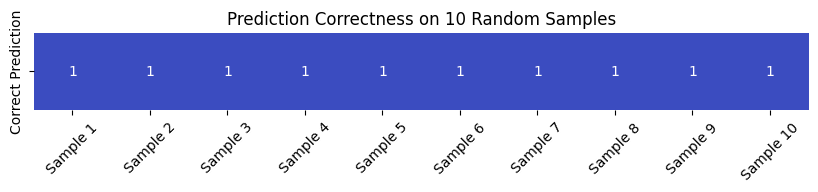

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

# Randomly select 10 sample positions
num_samples = 10
position_indices = random.sample(range(len(y_test)), num_samples)
position_indices.sort()  # Optional: for better visual order

# Get values
actual = y_test.iloc[position_indices].values
predicted = y_pred_all[position_indices]

# Create DataFrame for visualization
results_df = pd.DataFrame({
    'Sample': [f'Sample {i+1}' for i in range(num_samples)],
    'Actual': actual,
    'Predicted': predicted
})
results_df['Match'] = results_df['Actual'] == results_df['Predicted']

# Create a 2D list for annotation in heatmap
annotations = [[int(val) for val in results_df['Match']]]

# Plot heatmap
plt.figure(figsize=(10, 1))
sns.heatmap([results_df['Match']], cmap='coolwarm', cbar=False, annot=annotations, fmt='d')
plt.yticks([0.5], ['Correct Prediction'], va='center')
plt.xticks(ticks=np.arange(num_samples)+0.5, labels=results_df['Sample'], rotation=45)
plt.title("Prediction Correctness on 10 Random Samples")
plt.tight_layout()
plt.show()


In [ ]:
# # Get fraud prediction probabilities
# y_probs = rf_classifier.predict_proba(X_test)[:10, 1]  # Probabilities for class '1' (fraud)

# # Bar plot with confidence
# results_df['Confidence (fraud %)'] = y_probs * 100

# plt.figure(figsize=(10, 5))
# sns.barplot(x=results_df.index + 1, y='Confidence (fraud %)', data=results_df, hue='Actual', palette='Set2')
# plt.axhline(50, color='red', linestyle='--', label='50% Threshold')
# plt.title('Model Confidence in Fraud Prediction (10 Samples)')
# plt.xlabel('Sample Index')
# plt.ylabel('Confidence (%)')
# plt.legend(title='Actual is_fraud')
# plt.tight_layout()
# plt.show()


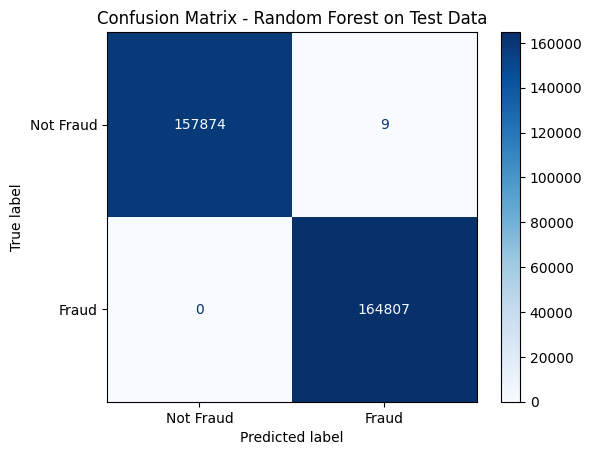

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_all = rf_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred_all)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Random Forest on Test Data')
plt.show()


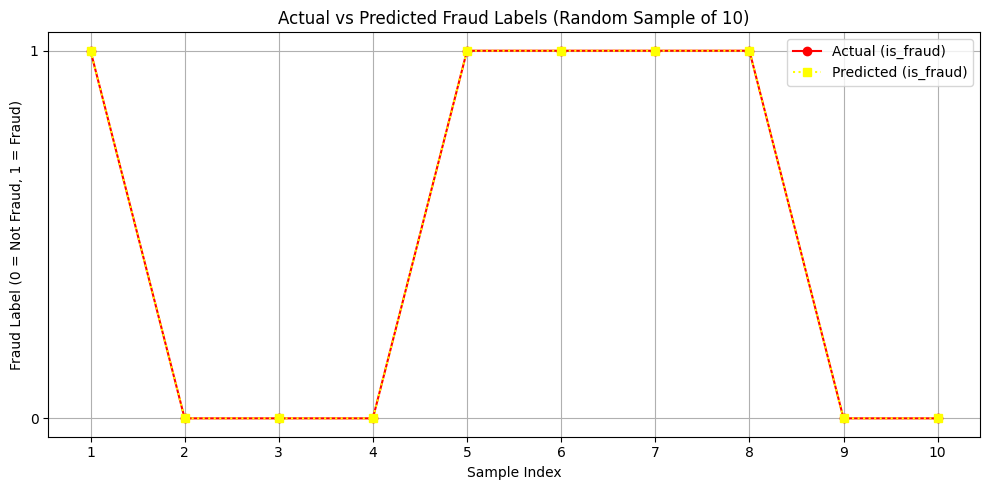

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np

# Randomly choose 10 sample positions (not labels!)
num_samples = 10
position_indices = random.sample(range(len(y_test)), num_samples)

# Sort for better visualization
position_indices.sort()

# Extract actual and predicted values by position
actual = y_test.iloc[position_indices].values
predicted = y_pred_all[position_indices]

# x-axis labels (1 to num_samples)
x_axis = range(1, num_samples + 1)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(x_axis, actual, marker='o', label='Actual (is_fraud)', color='red', linestyle='-')
plt.plot(x_axis, predicted, marker='s', label='Predicted (is_fraud)', color='yellow', linestyle=':')

# Highlight mismatches
for i, (act, pred) in enumerate(zip(actual, predicted), 1):
    if act != pred:
        plt.plot(i, act, 'ro')  # Red dot on mismatch

plt.title('Actual vs Predicted Fraud Labels (Random Sample of 10)')
plt.xlabel('Sample Index')
plt.ylabel('Fraud Label (0 = Not Fraud, 1 = Fraud)')
plt.legend()
plt.xticks(x_axis)
plt.yticks([0, 1])
plt.grid(True)
plt.tight_layout()
plt.show()
